# Modelos de Regresión Logística

## 1. Introducción a la Regresión Logística

Se trata de un **algoritmo estadístico** cuyo objetivo es aproximar una **función matemática acotada** en el intervalo [0, 1]. Así permite la estimación de las **probabilidades de pertenencia** de cada muestra a las distintas clases. Como la detección de sexismo es un problema de clasificación binario, se establece el umbral en 0.5 con el que asignar una clase a cada instancia aplicando las siguientes casuísticas:

* Si la probabilidad es **menor que 0.5** entonces la clase es **no sexista** (categoría 0). 
* Si la probabilidad es **mayor que 0.5** entonces la clase es **sexista** (categoría 1).

### 1.1. Condiciones de uso

* **Mínima correlación** entre los predictores o variables independientes.
* La existencia de una **relación lineal** entre los predictores y la probabilidad de cada variable dependiente.
* Mínima existencia de **outliers**.
* Conjunto de datos razonáblemente amplio.

### 1.2. Casos de uso

1. Construir **modelos lineales** para solventar problemas de clasificación cuyos datos son fácilmente separables.

2. Comprobar de la existencia de **relaciones lineales** entre los predictores y la variable dependiente en función de los valores de los coeficientes del hiperplano.

   - Si es 0 significa que **no existe una relación lineal** entre un predictor y la variable dependiente por lo que dicho predictor no ayuda en su predicción.

   - Si es mayor que 0 supone un crecimiento simultáneo del predictor al aumentar la variable dependiente, mientras que si es menor que 0 simboliza el incremento del predictor cuando disminuye la variable dependiente. Aunque en ambos casos el **predictor puede ser útil para predecir** la clase de una muestra.

## 2. Estructura del notebook

1. Introducción a la Regresión Logística
2. Estructura del notebook
3. Instalación y carga de librerías
4. Lectura y carga de datos
5. Técnicas de codificación de textos

## 3. Instalación y carga de librerías

Este apartado tiene como único propósito cargar las librerías y dependencias necesarias para la ejecución de este notebook, así como las funciones propiamente desarrolladas. Previo a ello deberán ser instaladas bien ejecutando el script *setup.sh* mediante el comando `bash setup.sh` con permisos de ejecución en distribuciones Linux, o bien ejecutando el compando `pip install -r requirements.txt`.

In [15]:
import sys
sys.path.append('../scripts')

# Import data read and compute functions
from data import read_training_dataset, read_testing_dataset

# Import text preprocess functions
from processing import *

# Import LR models and validation metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Import plot lib to show the confussion matrixes
import matplotlib.pyplot as plt

## 4. Lectura y carga de datos

En esta sección se pretende **cargar los datasets de entrenamiento y validación** procedentes de los correspondientes ficheros situados en la carpeta *data*. Al tener un **formato TSV** se deben leer como tablas aunque posteriormente se trabaje con ellos en formato *dataframe*. 

Tal y como se puede comprobar en los siguientes resultados las dimensiones de sendos conjuntos de datos se detallan a continuación:

* Conjunto de entrenamiento: **6.977 muestras**.
* Conjunto de validación: **4.368 muestras**.

In [16]:
# Read EXIST datasets
training_df = read_training_dataset()
testing_df = read_testing_dataset()

# Show the dimensions of the datasets
print("Training dataset dimensions:", training_df.shape)
print("Testing dataset dimensions:", testing_df.shape)

Training dataset dimensions: (6977, 7)
Testing dataset dimensions: (4368, 7)


## 5. Técnicas de codificación de textos

### 5.1. Bolsa de palabras

Es una técnica orientada a la **extracción de características** basado en **texto** que convierte cada documento en un vector de longitud fija a partir del cálculo de la frecuencia de sus términos. Si bien se trata de un procedimiento altamente sencillo y rápido de aplicar, **no** respeta el **orden de los términos** en los documentos y tampoco se considera el **contexto** de los mismos como consecuencia.


## 6. Experimentos y modelos

A continuación se detallan los experimentos más relevantes de entre las distintas pruebas realizadas mediante diversas combinaciones de técnicas de procesamiento de textos, codificación de documentos y algoritmos clásicos de Aprendizaje Automático.

### 6.1. Primer experimento

- **Procesamiento** de los conjuntos de entrenamiento y validación, incluyendo las siguientes técnicas:

  - Elimina caracteres especiales, no alfabéticos y signos de puntuación.
  - Elimina hashtags y menciones de usuarios.
  - Elimina *stopwords* de los documentos en inglés y español.
  - Convierte todos los caracteres en minúsculas.

- **Codificación** de la variable dependiente *task1* a **etiquetas numéricas** en los conjuntos de entrenamiento y validación, estableciendo la asignación *non-sexist*~0 y *sexist*~1.

- Generación de una **bolsa de palabras** para entrenamiento y otra para validación como codificación de documentos en valores numéricos.

- Entrenamiento, hiperparametrización y validación con **Regresión Logística** para la construcción de varios modelos, siendo la siguiente configuración la que mejores resultados de validación ha conseguido:

  - **Regularización L1** es la penalización que ha conseguido el *accuracy* y área sobre la curva ROC más elevados gracias a su tendencia de minimizar los coeficientes a cero. Mientras que con la **regularización L2** se consiguen también unos **resultados similares**, si no se aplica penalización ambas métricas descienden más de 5 puntos. Por lo tanto se concluye que la **aplicación de regularización** para un modelo de tales características y sobre este conjunto de datos es necesaria para **reducir el overfitting**, ya que el *accuracy* de entrenamiento es muy superior al de validación.

  - El **valor de la penalización** establecido que mejor rendimiento proporciona se encuentra **muy cercano a cero**, siendo el intervalo posible [0, infinito]. Este hecho nos indica que para aumentar la capacidad de predicción de un modelo con Regresión Logística y el conjunto de datos EXIST2022, es necesario aplicar una **fortísima penalización** con motivo de **reducir el overfitting** que tiende a aparecer.

Training accuracy 0.768
Test accuracy 0.697
AUC 0.702


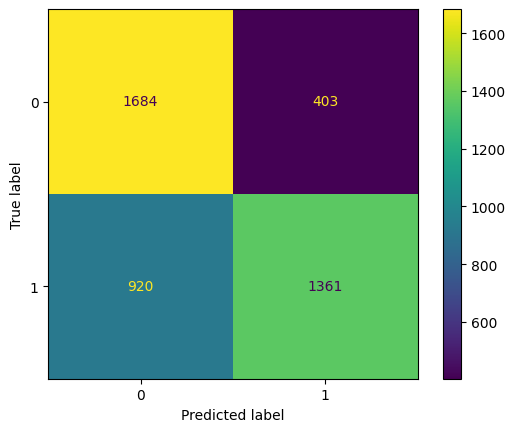

In [59]:
# Text processing in training and testing datasets
training_df = text_processing_pipeline(training_df, "text")
testing_df = text_processing_pipeline(testing_df, "text")

# Encode the class labels to numeric values for training and testing datasets providing the desirable assignation
encoding = {"non-sexist": 0, "sexist": 1}
encoded_training_labels = encode_to_numeric_labels(training_df, "task1", encoding)
encoded_testing_labels = encode_to_numeric_labels(testing_df, "task1", encoding)

# Train a CountVectorizer object to encode texts as bag of words for training and testing datasets
bag_words = to_bag_of_words(list(training_df["cleaned_text"].values), 
                            list(testing_df["cleaned_text"].values))

# Create and configure a LR model
lr_model1 = LogisticRegression(multi_class="ovr", solver="liblinear", penalty="l1", C=0.3)

# Train the LR model
lr_model1.fit(bag_words["training"], encoded_training_labels)

# Predict the testing labels with the trained LR model
training_predictions = lr_model1.predict(bag_words["training"])
testing_predictions = lr_model1.predict(bag_words["testing"])

# LR model validation
print("Training accuracy %.3f" %metrics.accuracy_score(encoded_training_labels, training_predictions))
print("Test accuracy %.3f" %metrics.accuracy_score(encoded_testing_labels, testing_predictions))
print("AUC %.3f" %metrics.roc_auc_score(encoded_testing_labels, testing_predictions))
conf_matrix = metrics.confusion_matrix(encoded_testing_labels, testing_predictions)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lr_model1.classes_).plot()
plt.show()
